In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [46]:
# Lade ein PNG-Bild (ersetzen Sie 'bild.png' durch den Dateipfad zu Ihrem Bild)
image = cv2.imread('weiss/Weiss (0).png', cv2.COLOR_BGR2GRAY)

if image is None:
    print("Das Bild konnte nicht geladen werden. Stellen Sie sicher, dass die Datei existiert und der Pfad korrekt ist.")
else:
    # Zeigen Sie die Bildgröße und einige andere Eigenschaften an
    print("Bildbreite: " + str(image.shape[1]))  # Breite des Bildes
    print("Bildhöhe: " + str(image.shape[0]))   # Höhe des Bildes
    print("--------------------------------")
    print("Helligkeit: ")  # Helligkeit des ersten Pixels (Blau-Kanal)
    print(image.mean())
    # Zeigen Sie das Bild im Jupyter Notebook an
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Deaktivieren der Achsen
    plt.show()


Das Bild konnte nicht geladen werden. Stellen Sie sicher, dass die Datei existiert und der Pfad korrekt ist.


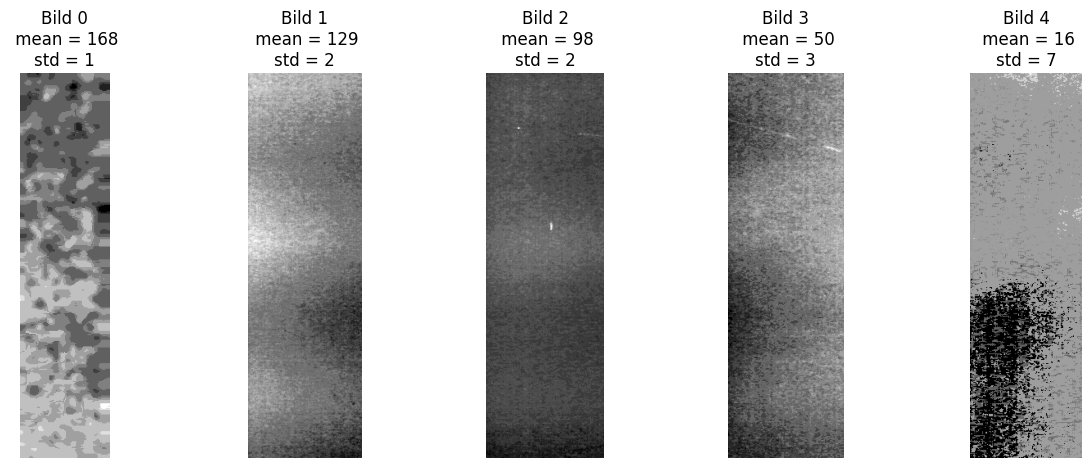

In [47]:
dateien = glob.glob('./grau/*.png')

plt.figure(figsize=(15, 5))

for idx, datei in enumerate(dateien):
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f'Bild {idx} konnte nicht geladen werden: {datei}')
    else:
        # Erstellen Sie einen Subplot für jedes Bild
        plt.subplot(1, len(dateien), idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Bild {idx}\n mean = {int(image.mean())}\nstd = {int(image.std())}')
        plt.axis('off')

# Zeigen Sie die Subplots im Jupyter Notebook an
plt.show()


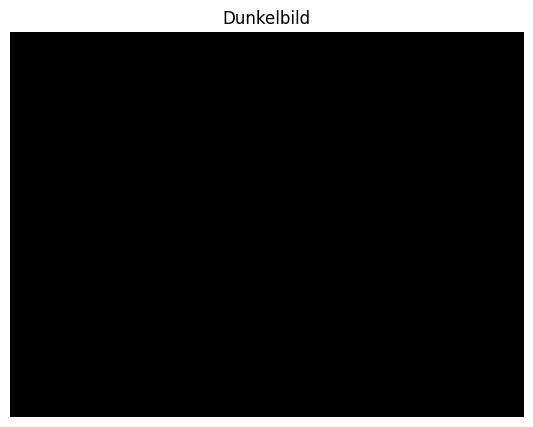

In [48]:
dateien = glob.glob('./schwarz/schwarz*.png')

# Sortieren der Dateien, um sicherzustellen, dass sie in der richtigen Reihenfolge geladen werden
dateien.sort()

# Bilderliste initialisieren
images = []

# Jedes Bild laden und zur Liste hinzufügen
for idx, datei in enumerate(dateien):
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Bild {idx+1} konnte nicht geladen werden: {datei}')
        continue
    images.append(image.astype(np.float64) / 255.0)  # Konvertieren in den Datentyp double

# Pixelweisen Mittelwert über alle Bilder berechnen, um das Dunkelbild zu erhalten
dark_image = np.mean(images, axis=0)

cv2.imwrite('schwarzbild.png', dark_image)

# Dunkelbild kontrastmaximiert darstellen
plt.figure(figsize=(15, 5))
plt.imshow(dark_image, cmap='gray')
plt.axis('off')
plt.title('Dunkelbild')
plt.show()

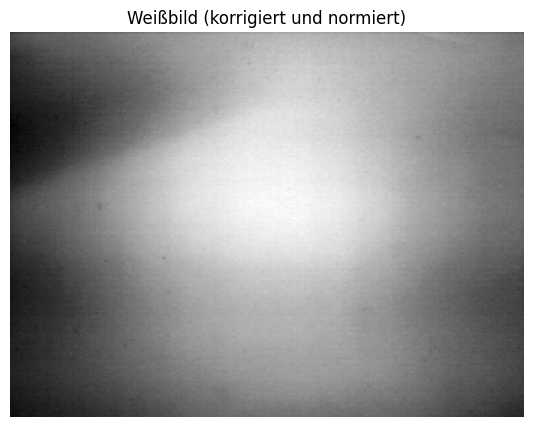

True

In [49]:
# Muster für die Weißbilddateien
weiss_dateien = glob.glob('./weiss/weiss*.png')

# Sortieren der Dateien, um sicherzustellen, dass sie in der richtigen Reihenfolge geladen werden
weiss_dateien.sort()

# Liste für die Weißbilder initialisieren
weiss_images = []

# Jedes Weißbild laden und zur Liste hinzufügen
for datei in weiss_dateien:
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Datei konnte nicht geladen werden: {datei}')
        continue
    weiss_images.append(image.astype(np.float64) / 255.0)  # Konvertieren in den Datentyp double

# Pixelweisen Mittelwert über alle Weißbilder berechnen
weiss_image_mean = np.mean(weiss_images, axis=0)

# Vom Mittelwertbild das Dunkelbild subtrahieren
# (Hier muss das Dunkelbild schon geladen und als `dark_image` verfügbar sein)
weiss_image_corrected = weiss_image_mean - dark_image

# Das korrigierte Weißbild normieren, so dass sein Mittelwert 1 ist
weiss_image_normalized = weiss_image_corrected / np.mean(weiss_image_corrected)

# Kontrastmaximiertes Weißbild darstellen
plt.figure(figsize=(15, 5))
plt.imshow(weiss_image_normalized, cmap='gray')
plt.axis('off')
plt.title('Weißbild (korrigiert und normiert)')
plt.show()

# Optional: Das korrigierte Weißbild speichern
cv2.imwrite('weissbild_korrigiert.png', weiss_image_normalized * 255)


In [50]:
grauwertkeil_pfad = './SchwarzWeiss.png'
dunkelbild_pfad = './schwarzbild.png'
weissbild_pfad = './weissbild_korrigiert.png'

# Bilder laden
grauwertkeil = cv2.imread(grauwertkeil_pfad, cv2.IMREAD_GRAYSCALE)
dunkelbild = cv2.imread(dunkelbild_pfad, cv2.IMREAD_GRAYSCALE) / 255.0
weissbild = cv2.imread(weissbild_pfad, cv2.IMREAD_GRAYSCALE) / 255.0

weissbild /= np.mean(weissbild)
grauwertkeil_korrigiert = (grauwertkeil / 255.0 - dunkelbild) / weissbild
grauwertkeil_korrigiert = np.clip(grauwertkeil_korrigiert, 0, 1)


In [51]:
# Identifizieren von defekten Pixeln
# Hier verwenden wir einfache Schwellwerte zur Demonstration.
# Für eine robustere Methode sollten Sie statistische Methoden verwenden.
hot_pixel_threshold = 0.9
dead_pixel_threshold = 0.1

hot_pixels = dunkelbild > hot_pixel_threshold
dead_pixels = weissbild < dead_pixel_threshold

# Korrektur der defekten Pixel durch Interpolation aus den Nachbarwerten
for i in range(1, grauwertkeil_korrigiert.shape[0] - 1):
    for j in range(1, grauwertkeil_korrigiert.shape[1] - 1):
        if hot_pixels[i, j] or dead_pixels[i, j]:
            grauwertkeil_korrigiert[i, j] = np.mean(grauwertkeil_korrigiert[i-1:i+2, j-1:j+2])

# Markieren Sie defekte Pixel im Bild (optional)
grauwertkeil_markiert = grauwertkeil_korrigiert.copy()
grauwertkeil_markiert[hot_pixels] = 1
grauwertkeil_markiert[dead_pixels] = 0


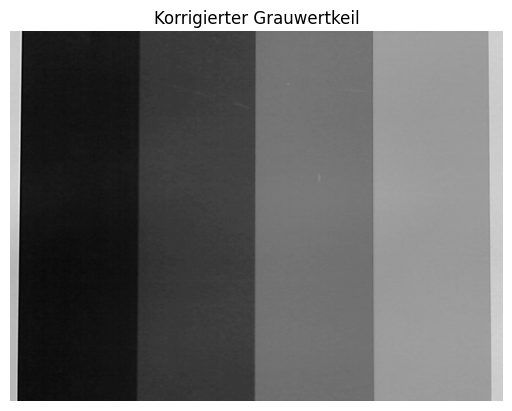

In [52]:
# Korrigiertes Bild speichern
cv2.imwrite('grauwertkeil_korrigiert.png', grauwertkeil_korrigiert * 255)

# Korrigiertes Bild anzeigen
plt.imshow(grauwertkeil_korrigiert, cmap='gray')
plt.axis('off')
plt.title('Korrigierter Grauwertkeil')
plt.show()


In [53]:
# Angenommen, wir kennen die Anzahl der Stufen und ihre Position im Bild
anzahl_stufen = 4
breite_stufe = grauwertkeil_korrigiert.shape[1] // anzahl_stufen

# Datenstruktur für die Ergebnisse
mittelwerte = []
standardabweichungen = []

# Berechnung für jede Stufe
for stufe in range(anzahl_stufen):
    # Beginn und Ende der Stufe im Bild
    start = stufe * breite_stufe
    ende = start + breite_stufe

    # Extraktion des Abschnitts für die aktuelle Stufe
    abschnitt = grauwertkeil_korrigiert[:, start:ende]

    # Berechnung des Mittelwerts und der Standardabweichung
    mittelwert = np.mean(abschnitt)
    standardabweichung = np.std(abschnitt)

    # Ergebnisse speichern
    mittelwerte.append(mittelwert)
    standardabweichungen.append(standardabweichung)

# Ergebnisse in eine Tabelle einfügen (hier als Text ausgegeben)
for stufe in range(anzahl_stufen):
    print(f"Stufe {stufe+1}: Mittelwert = {mittelwerte[stufe]:.4f}, Standardabweichung = {standardabweichungen[stufe]:.4f}")


Stufe 1: Mittelwert = 0.1079, Standardabweichung = 0.1567
Stufe 2: Mittelwert = 0.1902, Standardabweichung = 0.0319
Stufe 3: Mittelwert = 0.3825, Standardabweichung = 0.0294
Stufe 4: Mittelwert = 0.5221, Standardabweichung = 0.0490
